In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nn_robust_attacks.setup_mnist import MNIST, MNISTModel

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

data = MNIST()

# CNN Model for MNIST 
class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)

In [3]:
# Training variables
num_epochs = 10
batch_size = 128
train_temp = 1

training = False

# Model Training

In [4]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted/train_temp)

# Train first model 
modelname = "models/trained_model1"
model1 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model1.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model1.model.save(modelname)
else:
    model1.model = load_model(modelname, custom_objects={'fn':fn})
        
model1.model.summary()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
___________________________________________________________

In [5]:
# Train second model 
modelname = "models/trained_model2"
model2 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model2.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model2.model.save(modelname)
else:
    model2.model = load_model(modelname, custom_objects={'fn':fn})
    
model2.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [6]:
# Train third model 
modelname = "models/trained_model3"
model3 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model3.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model3.model.save(modelname)   
else:
    model3.model = load_model(modelname, custom_objects={'fn':fn})
    
model3.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 10, 10, 64)       

In [7]:
# Train fourth model 
modelname = "models/trained_model4"
model4 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model4.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model4.model.save(modelname)
else:
    model4.model = load_model(modelname, custom_objects={'fn':fn})
    
model4.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [8]:
# Train fifth model 
modelname = "models/trained_model5"
model5 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model5.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model5.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model5.model.save(modelname)
else:
    model5.model = load_model(modelname, custom_objects={'fn':fn})
    
model5.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 64)       

# Preprocess / Setup

In [9]:
from keras.datasets import mnist as data_keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = data_keras.load_data()
x_train = x_train[...,np.newaxis] /255.0
x_test = x_test[...,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Model performances
scores = model1.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model2.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model3.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model4.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model5.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 2s 183us/step
loss=0.060424025029380574, accuracy=0.9833999872207642
10000/10000 [==============================] - 2s 173us/step
loss=0.060767219057303735, accuracy=0.9829999804496765
10000/10000 [==============================] - 2s 174us/step
loss=0.1604284207782708, accuracy=0.9513999819755554
10000/10000 [==============================] - 2s 176us/step
loss=0.06374289788251045, accuracy=0.979200005531311
10000/10000 [==============================] - 2s 177us/step
loss=0.1024473569555208, accuracy=0.9670000076293945


In [11]:
plt.set_cmap('Greys_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
true_label = 0
num_img = 25

targets = np.array([to_categorical(9)])
for i in range(0, num_img - 1):
    targets = np.vstack([targets, np.array(to_categorical(9))])
    
inputs = np.load('inputs_0.csv.npy')

In [13]:
print(len(inputs))

25


# Helper Functions

In [14]:
def plot_adversarial(inputs, adv):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(inputs[0][:,:,0])
    ax2.imshow(adv[0][:,:,0])
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])

In [15]:
from numpy import savetxt

def save_results(inputs, adv, targets, subset_attacked):
    np.save('four_subset_data/inputs_att_FGSM_' + '_' + subset_attacked + '.csv', inputs)
    np.save('four_subset_data/adv_att_FGSM_' + subset_attacked + '.csv', adv)
    np.save('four_subset_data/targets_att_FGSM_' + subset_attacked + '.csv', targets)  

In [16]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return image_class[0], max(max(pr))

In [17]:
def attack_evaluation(num_img, adv, num_models):
    l = []
    for i in range(0, num_img):
        print(i)
        if num_models == 1:
            res = get_label_confidence(adv[i][np.newaxis, ...], model1.model)
        if num_models > 1: 
            res = [get_label_confidence(adv[i][np.newaxis, ...], model1.model), get_label_confidence(adv[i][np.newaxis, ...], model2.model), get_label_confidence(adv[i][np.newaxis, ...], model3.model), get_label_confidence(adv[i][np.newaxis, ...], model4.model)]
        print(res)
        l.append(res)
    return l

In [18]:
def size_of_attack(adv, inputs, num_img):
    perturb = adv - inputs
    perturb_mean =  np.sum(perturb) / num_img 
    perturb_std = np.std(np.array([sum(x) for x in perturb]))
    print('Mean', perturb_mean)
    print('Standard Deviation', perturb_std)

In [19]:
def transferability(num_img, adv):
    for i in range(0, num_img):
        print(i)
        print('Model 5', get_label_confidence(adv[i][np.newaxis, ...], model5.model))

In [20]:
def check_correct(subset, num_img, adv, num_models, target_label='9', true_label='0'):
    l = attack_evaluation(num_img, adv, num_models)
    correct = []
    for res in l:
        if subset == '1':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '2':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '3':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '4':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '12':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '13':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '14':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '23':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '24':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '34':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '123':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '124':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '134':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '234':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '1234':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
            
        if output:
            correct.append(l.index(res))
    return correct

In [21]:
def print_results(num_img, adv, num_models, inputs, subset):
    print(check_correct(subset, num_img, adv, num_models))
    print(size_of_attack(adv, inputs, num_img))
    print(transferability(num_img, adv))

In [82]:
x = np.load('inputs_0.csv.npy')[0:1]
x_orig = x
x_adv = x
x_noise = np.zeros_like(x)

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [83]:
# Set variables
N = 2
epochs = 21
epsilon = 0.01
true_class = 0
target_class = 9
prev_probs = []
prev_probs2 = []
prev_probs3 = []
prev_probs4 = []
prev_adv = []

for i in range(epochs): 
    # One hot encode the target class
    target = K.one_hot(target_class, 10)
    true = K.one_hot(true_class, 10)
    
    # Get the loss and gradient of the loss wrt the inputs
    loss = -1 * K.categorical_crossentropy(target, K.softmax(model1.model.output)) 
    loss2 = -1 * K.categorical_crossentropy(target, K.softmax(model2.model.output))
    loss3 = -1 * K.categorical_crossentropy(target, K.softmax(model3.model.output))
    loss4 = -1 * K.categorical_crossentropy(target, K.softmax(model4.model.output))

    grads = K.gradients(loss, model1.model.input)
    grads2 = K.gradients(loss2, model2.model.input)
    grads3 = K.gradients(loss3, model3.model.input)
    grads4 = K.gradients(loss4, model4.model.input)
    
    # Get the sign of the gradient
    delta = K.sign(grads[0]) + K.sign(grads2[0]) + K.sign(grads3[0]) + K.sign(grads4[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon * delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model1.model.input:x, model2.model.input:x, model3.model.input:x, model4.model.input:x})
    prev_adv.append(x_adv)
    
    preds = model1.model.predict(x_adv)
    preds2 = model2.model.predict(x_adv)
    preds3 = model3.model.predict(x_adv)
    preds4 = model4.model.predict(x_adv)
        
    if(target_class == np.argmax(preds[0]) and target_class == np.argmax(preds2[0]) and target_class == np.argmax(preds3[0]) and target_class == np.argmax(preds4[0])):
        break

    # Store the probability of the target class
    prev_probs.append(preds[0][target_class])
    prev_probs2.append(preds2[0][target_class])
    prev_probs3.append(preds3[0][target_class])
    prev_probs4.append(preds4[0][target_class])

    if i%5 == 0:
        print('Epoch:', i, '\t', 'Model1', '\t', 'Targeted', target_class, ':', preds[0][target_class], 
              '\t', get_label_confidence(x_adv, model1.model))
        print('Epoch:', i, '\t', 'Model2', '\t', 'Targeted', target_class, ':', preds2[0][target_class],
              '\t', get_label_confidence(x_adv, model2.model))
        print('Epoch:', i, '\t', 'Model3', '\t', 'Targeted', target_class, ':', preds3[0][target_class], 
              '\t', get_label_confidence(x_adv, model3.model))
        print('Epoch:', i, '\t', 'Model4', '\t', 'Targeted', target_class, ':', preds4[0][target_class], 
              '\t', get_label_confidence(x_adv, model4.model))
        print('L2 Norm:', np.linalg.norm(x_adv[0] - x[0]))
    
    x = x_adv

Epoch: 0 	 Model1 	 Targeted 9 : 0.48949793 	 (0, 0.99987555)
Epoch: 0 	 Model2 	 Targeted 9 : 0.69594455 	 (0, 0.99999857)
Epoch: 0 	 Model3 	 Targeted 9 : 3.1606874 	 (0, 0.99999905)
Epoch: 0 	 Model4 	 Targeted 9 : 3.675098 	 (0, 0.999993)
L2 Norm: 0.717844


In [84]:
print('Epoch:', i, '\t', 'Model1', '\t', 'Targeted', target_class, ':', preds[0][target_class], 
              '\t', get_label_confidence(x_adv, model1.model))
print('Epoch:', i, '\t', 'Model2', '\t', 'Targeted', target_class, ':', preds2[0][target_class],
              '\t', get_label_confidence(x_adv, model2.model))
print('Epoch:', i, '\t', 'Model3', '\t', 'Targeted', target_class, ':', preds3[0][target_class], 
              '\t', get_label_confidence(x_adv, model3.model))
print('Epoch:', i, '\t', 'Model4', '\t', 'Targeted', target_class, ':', preds4[0][target_class], 
              '\t', get_label_confidence(x_adv, model4.model))
print('L2 Norm:', np.linalg.norm(x_adv[0] - x[0]))

Epoch: 5 	 Model1 	 Targeted 9 : 6.186545 	 (9, 0.4860687)
Epoch: 5 	 Model2 	 Targeted 9 : 7.1531405 	 (9, 0.81924665)
Epoch: 5 	 Model3 	 Targeted 9 : 10.36728 	 (9, 0.99837)
Epoch: 5 	 Model4 	 Targeted 9 : 8.483992 	 (9, 0.9760012)
L2 Norm: 0.6907966


In [85]:
def plot_adversarial(inputs, adv):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax2.axis('off')
    ax2.imshow(inputs[0][:,:,0])
    ax1.axis('off')
    ax1.imshow(adv[0][:,:,0])
    ax3.axis('off')
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])
    ax1.margins(0,0)
    ax2.margins(0,0)
    ax3.margins(0,0)
    fig.savefig('attack_example_FGSM.pdf', bbox_inches = 'tight', pad_inches = 0)

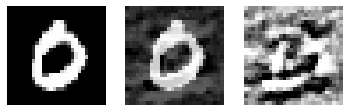

In [86]:
plot_adversarial(x, x_orig)